# Exploring the Data 

In [751]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np, pandas as pd; np.random.seed(0)
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split


In [752]:
df = pd.read_csv('airbnb_cleaned_.csv')

In [753]:
df.head()

,id,host_id,host_name,host_since,host_response_rate,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,bathrooms,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,monthly_price,bedrooms,beds,accommodates,zipcode_98052,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98104-4417,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98199,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,2318,2536,Megan,8/26/08,100%,2,Central Area,47.61082,-122.29082,2.5,NaN,296,unknown,unknown,500,250,8,30,1000,100,10,10,10,10,2,0.21,unknown,4,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5682,8993,Maddy,3/3/09,unknown,1,Delridge,47.52398,-122.35989,1.0,NaN,48,400,1250,120,45,1,3,14,95,10,10,9,10,1,3.99,1250,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,6606,14942,Joyce,4/26/09,100%,5,Other neighborhoods,47.65411,-122.33761,1.0,NaN,90,670,unknown,200,40,2,2,1125,92,9,9,10,9,3,1.19,unknown,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9419,30559,Angielena,8/9/09,100%,8,Other neighborhoods,47.55062,-122.32014,3.0,200.0,62,580,1500,100,10,1,2,60,93,10,10,10,10,8,1.29,1500,1,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,9460,30832,Siena,8/10/09,100%,4,Downtown,47.61265,-122.32936,1.0,NaN,99,unknown,unknown,0,45,1,3,29,98,10,10,10,10,4,3.62,unknown,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [754]:
df.columns

Index(['id', 'host_id', 'host_name', 'host_since', 'host_response_rate',
       'host_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'bathrooms', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month', 'monthly_price ',
       'bedrooms', 'beds', 'accommodates', 'zipcode_98052', 'zipcode_98101',
       'zipcode_98102', 'zipcode_98103', 'zipcode_98104', 'zipcode_98104-4417',
       'zipcode_98105', 'zipcode_98106', 'zipcode_98107', 'zipcode_98108',
       'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116',
       'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98121',
       'zipcode_98122', 'zipcode_98125', 'zipcode_9812

In [755]:
#clean the data a little more... 

In [756]:
df = df.drop(columns = ['host_id','host_name', 'host_response_rate','monthly_price ', 'monthly_price', 'weekly_price'])

In [757]:
df.columns

Index(['id', 'host_since', 'host_listings_count',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'bathrooms',
       'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'bedrooms', 'beds', 'accommodates',
       'zipcode_98052', 'zipcode_98101', 'zipcode_98102', 'zipcode_98103',
       'zipcode_98104', 'zipcode_98104-4417', 'zipcode_98105', 'zipcode_98106',
       'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118',
       'zipcode_98119', 'zipcode_98121', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98134', 'zipcode_98136',
       'zipcode_98144', 'zipcode_98146', '

In [758]:
cat_feats = ['neighbourhood_group_cleansed', 'bathrooms']

In [759]:
adf = df[cat_feats]

In [760]:
cat_df = pd.get_dummies(adf, drop_first=True)

In [761]:
cat_df.columns

Index(['bathrooms', 'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'neighbourhood_group_cleansed_West Seattle'],
      dtype='object')

In [762]:
df = pd.concat([adf, df], axis = 1)

In [763]:
df= df.drop(columns = ['neighbourhood_group_cleansed', 'bathrooms', 'host_since', 'square_feet'])

In [764]:
df.head()

,id,host_listings_count,latitude,longitude,price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bedrooms,beds,accommodates,zipcode_98052,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98104-4417,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98199,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,2318,2,47.61082,-122.29082,296,500,250,8,30,1000,100,10,10,10,10,2,0.21,4,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5682,1,47.52398,-122.35989,48,120,45,1,3,14,95,10,10,9,10,1,3.99,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,6606,5,47.65411,-122.33761,90,200,40,2,2,1125,92,9,9,10,9,3,1.19,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9419,8,47.55062,-122.32014,62,100,10,1,2,60,93,10,10,10,10,8,1.29,1,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,9460,4,47.61265,-122.32936,99,0,45,1,3,29,98,10,10,10,10,4,3.62,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [765]:
df.to_csv(r'airbnb_cat_cleaned.csv')

In [766]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7078 entries, 0 to 7077
Data columns (total 58 columns):
id                                       7078 non-null int64
host_listings_count                      7078 non-null int64
latitude                                 7078 non-null float64
longitude                                7078 non-null float64
price                                    7078 non-null int64
security_deposit                         7078 non-null int64
cleaning_fee                             7078 non-null int64
guests_included                          7078 non-null int64
minimum_nights                           7078 non-null int64
maximum_nights                           7078 non-null int64
review_scores_rating                     7078 non-null int64
review_scores_accuracy                   7078 non-null int64
review_scores_cleanliness                7078 non-null int64
review_scores_location                   7078 non-null int64
review_scores_value                

# OLS = Exploring data with categorical values 

In [767]:
outcome = 'price'

In [768]:
subs= [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')]
def col_formatting(col):
    for old, new in subs:
        col= col.replace(old,new)
    return col

In [769]:
df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)

x_cols = list(df.columns)
x_cols.remove(outcome)

In [770]:
x_cols

['id',
 'host_listings_count',
 'latitude',
 'longitude',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month',
 'bedrooms',
 'beds',
 'accommodates',
 'zipcode_98052',
 'zipcode_98101',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98104',
 'zipcode_98104_4417',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98121',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_98126',
 'zipcode_98133',
 'zipcode_98134',
 'zipcode_98136',
 'zipcode_98144',
 'zipcode_98146',
 'zipcode_98155',
 'zipcode_98168',
 'zipcode_98177',
 'zipcode_98178',
 'zipcode_98199',
 'room_type_Hotel_room',
 'room_type_Private_room',
 '

In [287]:
variables = '+'.join(x_cols)
formula = outcome + '~' + variables
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     164.7
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:34:09   Log-Likelihood:                -43381.
No. Observations:                7078   AIC:                         8.688e+04
Df Residuals:                    7020   BIC:                         8.728e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                             -1.006e+04    1.8e+04     -0.559      0.576   -4.53e+04    2.52e+04
id                                     6.483e-08   1.39e-07      0.466      0.641   -2.08e-07    3.37e-07
host_listings_count                       0.4289      0.007     60.297      0.000       0.415       0.443
latitude                               -192.9294    142.877     -1.350      0.177    -473.011      87.152
longitude                              -159.0043    140.903     -1.128      0.259    -435.216     117.208
security_deposit                          0.0189      0.004      4.754      0.000       0.011       0.027
cleaning_fee                              0.3771      0.037     10.232      0.000       0.305       0.449
guests_included                           6.7803      1.009      6.717      0.000       4.802       8.759
minimum_nights                           -0.3239      0.105     -3.087      0.002      -0.530      -0.118
maximum_nights                            0.0002      0.003      0.093      0.926      -0.005       0.005
review_scores_rating                      1.0373      0.370      2.805      0.005       0.312       1.762
review_scores_accuracy                   -4.8444      2.983     -1.624      0.104     -10.692       1.003
review_scores_cleanliness                 4.6253      2.455      1.884      0.060      -0.186       9.437
review_scores_location                    4.2136      2.995      1.407      0.160      -1.658      10.085
review_scores_value                      -8.5278      2.762     -3.087      0.002     -13.943      -3.113
calculated_host_listings_count           -1.0495      0.030    -35.166      0.000      -1.108      -0.991
reviews_per_month                        -4.8612      0.734     -6.626      0.000      -6.299      -3.423
bedrooms                                 28.2882      2.450     11.546      0.000      23.485      33.091
beds                                      2.1108      1.548      1.364      0.173      -0.923       5.144
accommodates                              5.1766      1.330      3.891      0.000       2.569       7.785
zipcode_98052                          -179.8020    158.052     -1.138      0.255    -489.631     130.027
zipcode_98101                            -9.6453    111.857     -0.086      0.931    -228.919     209.628
zipcode_98102                           -61.7273    111.772     -0.552      0.581    -280.834     157.379
zipcode_98103                           -93.2080    111.889     -0.833      0.405    -312.545     126.129
zipcode_98104                            27.2911    112.006      0.244      0.808    -192.274     246.856
zipcode_98104_4417                      797.6764    158.037      5.047      0.000     487.876    1107.477
zipcode_9

In [771]:
#remove variables with a pvalue < 0.05

In [772]:
# examine the features most correlated with the outcome
corr = df.corr()
abs(corr).sort_values(by = 'price',  ascending= False)['price']

price                                    1.000000
host_listings_count                      0.529654
cleaning_fee                             0.422569
accommodates                             0.379564
bedrooms                                 0.344402
beds                                     0.317770
zipcode_98101                            0.303821
guests_included                          0.294879
room_type_Private_room                   0.254906
reviews_per_month                        0.194298
calculated_host_listings_count           0.183022
security_deposit                         0.132308
review_scores_value                      0.123807
maximum_nights                           0.117481
review_scores_accuracy                   0.116010
review_scores_rating                     0.091260
zipcode_98121                            0.075346
zipcode_98103                            0.069715
room_type_Shared_room                    0.068823
zipcode_98104                            0.068771


In [773]:
model2 = ols(formula = "price~host_listings_count+cleaning_fee+security_deposit+accommodates+bedrooms+minimum_nights+guests_included+reviews_per_month+review_scores_rating+calculated_host_listings_count+review_scores_value+room_type_Shared_room+room_type_Private_room+room_type_Hotel_room+host_response_time_unknown+host_response_time_within_a_day+host_response_time_within_a_few_hours+host_response_time_within_an_hour",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     456.2
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        01:55:46   Log-Likelihood:                -43656.
No. Observations:                7078   AIC:                         8.735e+04
Df Residuals:                    7059   BIC:                         8.748e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               209.5098     33.150      6.320      0.000     144.526     274.494
host_listings_count                       0.4523      0.007     65.152      0.000       0.439       0.466
cleaning_fee                              0.4756      0.037     12.834      0.000       0.403       0.548
security_deposit                          0.0201      0.004      4.911      0.000       0.012       0.028
accommodates                              7.4867      1.149      6.516      0.000       5.234       9.739
bedrooms                                 17.9285      2.429      7.381      0.000      13.167      22.690
minimum_nights                           -0.3742      0.108     -3.452      0.001      -0.587      -0.162
guests_included                           6.5723      1.042      6.310      0.000       4.531       8.614
reviews_per_month                        -4.7836      0.735     -6.506      0.000      -6.225      -3.342
review_scores_rating                      1.0544      0.309      3.407      0.001       0.448       1.661
calculated_host_listings_count           -0.9177      0.030    -30.883      0.000      -0.976      -0.859
review_scores_value                     -10.9967      2.747     -4.003      0.000     -16.382      -5.611
room_type_Shared_room                   -55.2941     14.418     -3.835      0.000     -83.557     -27.031
room_type_Private_room                  -30.0857      4.015     -7.493      0.000     -37.956     -22.215
room_type_Hotel_room                    158.0863     11.965     13.212      0.000     134.631     181.541
host_response_time_unknown             -140.1686     26.111     -5.368      0.000    -191.355     -88.982
host_response_time_within_a_day        -143.3135     26.993     -5.309      0.000    -196.227     -90.400
host_response_time_within_a_few_hours  -149.4309     26.324     -5.677      0.000    -201.033     -97.828
host_response_time_within_an_hour      -143.0945     26.011     -5.501      0.000    -194.084     -92.105
==============================================================================
Omnibus:                    13562.340   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         78827570.130
Skew:                          14.340   Prob(JB):                         0.00
Kurtosis:                     519.203   Cond. No.                     1.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ridge and Lasso

In [774]:
y = df[["price"]]
X = df[['host_listings_count', 'cleaning_fee', 'security_deposit','accommodates','bedrooms','minimum_nights','zipcode_98104_4417','zipcode_98101','zipcode_98121','zipcode_98103','guests_included','reviews_per_month','review_scores_rating','calculated_host_listings_count','review_scores_value','room_type_Shared_room','room_type_Private_room','room_type_Hotel_room','host_response_time_unknown','host_response_time_within_a_day','host_response_time_within_a_few_hours','host_response_time_within_an_hour']]

scale = MinMaxScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)

In [775]:
# Perform t`est train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.2)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [776]:
df.head()

,id,host_listings_count,latitude,longitude,price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bedrooms,beds,accommodates,zipcode_98052,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98104_4417,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98199,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,2318,2,47.61082,-122.29082,296,500,250,8,30,1000,100,10,10,10,10,2,0.21,4,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5682,1,47.52398,-122.35989,48,120,45,1,3,14,95,10,10,9,10,1,3.99,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,6606,5,47.65411,-122.33761,90,200,40,2,2,1125,92,9,9,10,9,3,1.19,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9419,8,47.55062,-122.32014,62,100,10,1,2,60,93,10,10,10,10,8,1.29,1,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,9460,4,47.61265,-122.32936,99,0,45,1,3,29,98,10,10,10,10,4,3.62,1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [777]:
X_train.shape

(5662, 22)

In [778]:
X_test.shape

(1416, 22)

In [779]:
y_train.shape

(5662, 1)

In [856]:
y_test.shape

(1416, 1)

In [780]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[[ 7.69952180e+02  3.41940253e+02  1.09354437e+02  1.63760515e+02
   1.96847258e+02 -2.09372318e+02 -7.10542736e-14  5.71964236e+01
   3.13106545e+01 -1.99515762e+01  7.73848767e+01 -6.25249947e+01
   7.96729142e+01 -3.32282905e+02 -7.01414694e+01 -4.86270976e+01
  -2.53919216e+01  1.61356148e+02 -1.77213511e+02 -1.80756142e+02
  -1.86847594e+02 -1.81715790e+02]]
Unpenalized Linear Regression Intercept:[239.13996678]


In [781]:
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

Lasso Regression Coefficients are:[ 745.12889593  317.97258775   64.89800273  146.02342315  212.59165805
   -0.            0.           55.93073844   27.79882156  -19.05234648
   72.98747731  -54.83934559    0.         -309.0201629    -0.
  -28.88905159  -28.05011964  142.02473761    0.           -0.
   -7.78546668   -2.62298479]
Lasso Linear Regression Intercept:[71.22032394]


In [782]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

Ridge Regression Coefficients are:[[ 767.08917869  338.34833568  108.35751092  163.72207695  197.60030692
  -200.21974079    0.           57.56800139   31.43247595  -19.97538744
    77.73163998  -62.85300487   78.42741147 -330.5398349   -69.40587641
   -48.66551704  -25.61243047  160.39436479 -168.50060027 -171.8237593
  -177.97151393 -172.84024502]]
Ridge Linear Regression Intercept:[231.08617797]


In [783]:
# create predictions
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = np.reshape(lasso.predict(X_train),(5662,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test),(1416,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [784]:
print(y_h_ridge_train.shape)
print(y_h_ridge_test.shape)

(5662, 1)
(1416, 1)


In [785]:
print(type(y_h_lasso_train))
print(type(y_h_ridge_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [786]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model price    7.988408e+07
dtype: float64
Test Error Ridge Model price    1.294335e+07
dtype: float64


Train Error Lasso Model price    8.091088e+07
dtype: float64
Test Error Lasso Model price    1.283147e+07
dtype: float64


Train Error Unpenalized Linear Model price    7.988166e+07
dtype: float64
Test Error Unpenalized Linear Model price    1.297027e+07
dtype: float64


In [787]:
#After testing Ridge and Lasso... the test errors are the same 
#RMSE 

In [788]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_h_lin_test)
np.sqrt(mse)

95.70682965163094

In [854]:
mse

9159.797241966304

In [789]:
df.describe()

,id,host_listings_count,latitude,longitude,price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bedrooms,beds,accommodates,zipcode_98052,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98104_4417,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98155,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98199,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
count,7.078000e+03,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000,7078.000000
mean,1.961836e+07,77.460582,47.624820,-122.333746,164.986154,217.694405,72.823820,2.117689,3.751907,575.970896,95.249364,9.738909,9.657248,9.809409,9.514976,23.862391,2.476204,1.412970,1.967505,3.804606,0.000141,0.073043,0.050438,0.097061,0.031365,0.000141,0.046623,0.026702,0.038994,0.018367,0.052275,0.038288,0.042102,0.031647,0.039842,0.049590,0.043939,0.052840,0.107658,0.019780,0.014835,0.017095,0.000424,0.014128,0.056654,0.002967,0.000424,0.000141,0.005227,0.005934,0.021192,0.014411,0.194688,0.010031,0.148064,0.032354,0.089291,0.727465
std,1.025225e+07,278.244804,0.046764,0.032338,169.819912,364.748757,55.664452,1.738157,12.914499,544.521535,6.793226,0.694505,0.705905,0.545499,0.753674,67.698091,2.288903,1.043351,1.556461,2.360141,0.011886,0.260226,0.218862,0.296062,0.174314,0.011886,0.210846,0.161224,0.193594,0.134283,0.222596,0.191903,0.200837,0.175072,0.195601,0.217112,0.204974,0.223729,0.309969,0.139252,0.120900,0.129635,0.020585,0.118028,0.231197,0.054393,0.020585,0.011886,0.072117,0.076808,0.144036,0.119186,0.395988,0.099659,0.355189,0.176950,0.285183,0.445295
min,2.318000e+03,0.000000,47.495870,-122.419250,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.215821e+07,1.000000,47.603223,-122.355130,85.000000,0.000000,35.000000,1.000000,1.000000,29.000000,94.000000,10.000000,9.000000,10.000000,9.000000,1.000000,0.560000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.042881e+07,2.000000,47.619900,-122.332040,120.000000,100.000000,60.000000,2.000000,2.000000,365.000000,97.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.810000,1.000000,

# Refining our model 

In [307]:
train = pd.concat([X_train, y_train], axis=1)
train.head()

,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,zipcode_98104_4417,zipcode_98101,zipcode_98121,zipcode_98103,...,calculated_host_listings_count,review_scores_value,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,price
6073,0.000557,0.107143,0.02,0.111111,0.125,0.000000,0.0,0.0,0.0,0.0,...,0.00000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,110
1786,0.001114,0.035714,0.03,0.037037,0.125,0.002506,0.0,0.0,0.0,0.0,...,0.00000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,89
6988,0.144290,0.000000,0.00,0.037037,0.125,0.000000,0.0,0.0,0.0,0.0,...,0.25641,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,74
4037,0.529805,0.184286,0.10,0.111111,0.250,0.002506,0.0,1.0,0.0,0.0,...,1.00000,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,299
1155,0.000557,0.032857,0.00,0.000000,0.125,0.002506,0.0,0.0,0.0,0.0,...,0.00000,1.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,70


In [308]:
train.columns

Index(['host_listings_count', 'cleaning_fee', 'security_deposit',
       'accommodates', 'bedrooms', 'minimum_nights', 'zipcode_98104_4417',
       'zipcode_98101', 'zipcode_98121', 'zipcode_98103', 'guests_included',
       'reviews_per_month', 'review_scores_rating',
       'calculated_host_listings_count', 'review_scores_value',
       'room_type_Shared_room', 'room_type_Private_room',
       'room_type_Hotel_room', 'host_response_time_unknown',
       'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour', 'price'],
      dtype='object')

In [309]:
cols = ['host_listings_count', 'cleaning_fee', 'security_deposit',
       'accommodates', 'bedrooms', 'minimum_nights', 'zipcode_98104_4417',
       'zipcode_98101', 'zipcode_98121', 'zipcode_98103', 'guests_included',
       'reviews_per_month', 'review_scores_rating',
       'calculated_host_listings_count', 'review_scores_value',
       'room_type_Shared_room', 'room_type_Private_room',
       'room_type_Hotel_room', 'host_response_time_unknown',
       'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour']

In [310]:
formula = 'price~'+'+'.join(cols)

In [311]:
print(formula)

price~host_listings_count+cleaning_fee+security_deposit+accommodates+bedrooms+minimum_nights+zipcode_98104_4417+zipcode_98101+zipcode_98121+zipcode_98103+guests_included+reviews_per_month+review_scores_rating+calculated_host_listings_count+review_scores_value+room_type_Shared_room+room_type_Private_room+room_type_Hotel_room+host_response_time_unknown+host_response_time_within_a_day+host_response_time_within_a_few_hours+host_response_time_within_an_hour


In [312]:
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     306.3
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:35:01   Log-Likelihood:                -35083.
No. Observations:                5662   AIC:                         7.021e+04
Df Residuals:                    5640   BIC:                         7.036e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               239.1400     35.046      6.824      0.000     170.437     307.843
host_listings_count                     769.9522     14.967     51.442      0.000     740.611     799.294
cleaning_fee                            341.9403     30.758     11.117      0.000     281.642     402.239
security_deposit                        109.3544     24.106      4.536      0.000      62.097     156.612
accommodates                            163.7605     35.618      4.598      0.000      93.936     233.585
bedrooms                                196.8473     22.756      8.650      0.000     152.236     241.459
minimum_nights                         -209.3723     56.392     -3.713      0.000    -319.922     -98.823
zipcode_98104_4417                     -2.98e-13   2.46e-14    -12.098      0.000   -3.46e-13    -2.5e-13
zipcode_98101                            57.1964      7.286      7.850      0.000      42.913      71.480
zipcode_98121                            31.3107      7.471      4.191      0.000      16.665      45.956
zipcode_98103                           -19.9516      5.426     -3.677      0.000     -30.589      -9.314
guests_included                          77.3849     17.872      4.330      0.000      42.348     112.422
reviews_per_month                       -62.5250     11.976     -5.221      0.000     -86.003     -39.047
review_scores_rating                     79.6729     28.472      2.798      0.005      23.858     135.488
calculated_host_listings_count         -332.2829     12.083    -27.500      0.000    -355.970    -308.595
review_scores_value                     -70.1415     25.490     -2.752      0.006    -120.111     -20.172
room_type_Shared_room                   -48.6271     16.833     -2.889      0.004     -81.627     -15.628
room_type_Private_room                  -25.3919      4.655     -5.455      0.000     -34.517     -16.267
room_type_Hotel_room                    161.3561     13.398     12.043      0.000     135.090     187.622
host_response_time_unknown             -177.2135     30.051     -5.897      0.000    -236.126    -118.301
host_response_time_within_a_day        -180.7561     31.045     -5.822      0.000    -241.617    -119.895
host_response_time_within_a_few_hours  -186.8476     30.309     -6.165      0.000    -246.266    -127.429
host_response_time_within_an_hour      -181.7158     29.947     -6.068      0.000    -240.424    -123.008
==============================================================================
Omnibus:                    11336.894   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         76378613.620
Skew:                          15.802   Prob(JB):                         0.00
Kurtosis:  

# VIF

multicolliniarity 

In [313]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(cols, vif))

[('host_listings_count', 2.37441379441891),
 ('cleaning_fee', 6.1900852105542254),
 ('security_deposit', 1.6054093395678608),
 ('accommodates', 9.416407734185798),
 ('bedrooms', 10.004721830711318),
 ('minimum_nights', 1.0845152171314068),
 ('zipcode_98104_4417', 1.0010696762548623),
 ('zipcode_98101', 1.5029640094138041),
 ('zipcode_98121', 1.1498352661198161),
 ('zipcode_98103', 1.1415526685401056),
 ('guests_included', 2.455135342019481),
 ('reviews_per_month', 3.2450437583391873),
 ('review_scores_rating', 269.6085577165767),
 ('calculated_host_listings_count', 2.3910862811875635),
 ('review_scores_value', 224.45766575230812),
 ('room_type_Shared_room', 1.1094545036575147),
 ('room_type_Private_room', 1.6624882720918017),
 ('room_type_Hotel_room', 1.0939730162052679),
 ('host_response_time_unknown', 17.173387302616966),
 ('host_response_time_within_a_day', 4.5291739719691515),
 ('host_response_time_within_a_few_hours', 10.973028671431097),
 ('host_response_time_within_an_hour', 81.

**Remove review_scores_value**

In [314]:
df2 = df.drop(['review_scores_value'], axis = 1)

In [315]:
y2 = df2[["price"]]
X2 = df2[['host_listings_count', 'cleaning_fee', 'security_deposit','accommodates','bedrooms','minimum_nights','zipcode_98104_4417','zipcode_98101','zipcode_98121','zipcode_98103','guests_included','reviews_per_month','review_scores_rating','calculated_host_listings_count','room_type_Shared_room','room_type_Private_room','room_type_Hotel_room','host_response_time_unknown','host_response_time_within_a_day','host_response_time_within_a_few_hours','host_response_time_within_an_hour']]

In [316]:
cols2 = ['host_listings_count', 'cleaning_fee', 'security_deposit',
       'accommodates', 'bedrooms', 'minimum_nights', 'zipcode_98104_4417',
       'zipcode_98101', 'zipcode_98121', 'zipcode_98103', 'guests_included',
       'reviews_per_month', 'review_scores_rating',
       'calculated_host_listings_count',
       'room_type_Shared_room', 'room_type_Private_room',
       'room_type_Hotel_room', 'host_response_time_unknown',
       'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour']

In [317]:
formula2 = 'price~'+'+'.join(cols2)

In [318]:
model = ols(formula=formula2, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     408.0
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:35:11   Log-Likelihood:                -43573.
No. Observations:                7078   AIC:                         8.719e+04
Df Residuals:                    7056   BIC:                         8.734e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               183.8042     32.416      5.670      0.000     120.260     247.348
host_listings_count                       0.4290      0.007     59.140      0.000       0.415       0.443
cleaning_fee                              0.4504      0.037     12.273      0.000       0.378       0.522
security_deposit                          0.0209      0.004      5.154      0.000       0.013       0.029
accommodates                              6.7300      1.138      5.913      0.000       4.499       8.961
bedrooms                                 22.5390      2.446      9.215      0.000      17.745      27.334
minimum_nights                           -0.3725      0.107     -3.477      0.001      -0.583      -0.163
zipcode_98104_4417                      867.3820    114.352      7.585      0.000     643.218    1091.546
zipcode_98101                            57.1860      6.162      9.280      0.000      45.106      69.266
zipcode_98121                            34.7425      6.338      5.481      0.000      22.317      47.168
zipcode_98103                           -19.4792      4.658     -4.182      0.000     -28.610     -10.348
guests_included                           6.3388      1.030      6.153      0.000       4.319       8.358
reviews_per_month                        -4.7660      0.727     -6.553      0.000      -6.192      -3.340
review_scores_rating                      0.1757      0.213      0.826      0.409      -0.241       0.593
calculated_host_listings_count           -0.9444      0.029    -32.032      0.000      -1.002      -0.887
room_type_Shared_room                   -46.6231     14.280     -3.265      0.001     -74.617     -18.629
room_type_Private_room                  -27.5674      3.980     -6.927      0.000     -35.369     -19.766
room_type_Hotel_room                    156.5889     11.831     13.235      0.000     133.396     179.782
host_response_time_unknown             -139.6568     25.814     -5.410      0.000    -190.261     -89.053
host_response_time_within_a_day        -142.4723     26.685     -5.339      0.000    -194.784     -90.161
host_response_time_within_a_few_hours  -147.3416     26.025     -5.662      0.000    -198.359     -96.325
host_response_time_within_an_hour      -142.2603     25.716     -5.532      0.000    -192.671     -91.850
==============================================================================
Omnibus:                    13767.791   Durbin-Watson:                   1.746
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         86946288.956
Skew:                          14.824   Prob(JB):                         0.00
Kurtosis:                     545.160   Cond. No.                     3.68e+04
======================================

In [319]:
vif2 = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
list(zip(cols2, vif2))

[('host_listings_count', 2.371963697100718),
 ('cleaning_fee', 6.131611322282436),
 ('security_deposit', 1.6051086031566166),
 ('accommodates', 13.999269132474316),
 ('bedrooms', 9.98494289342114),
 ('minimum_nights', 1.1249442811493728),
 ('zipcode_98104_4417', 1.0010471359324042),
 ('zipcode_98101', 1.502845362796993),
 ('zipcode_98121', 1.1498354975019411),
 ('zipcode_98103', 1.1410002431982824),
 ('guests_included', 4.31638972064802),
 ('reviews_per_month', 3.255318084754391),
 ('review_scores_rating', 140.83491381996592),
 ('calculated_host_listings_count', 2.4047393804965638),
 ('room_type_Shared_room', 1.10744287137823),
 ('room_type_Private_room', 1.6594748633621565),
 ('room_type_Hotel_room', 1.092884873517671),
 ('host_response_time_unknown', 22.056355267556665),
 ('host_response_time_within_a_day', 5.5909087640171835),
 ('host_response_time_within_a_few_hours', 13.917712050544948),
 ('host_response_time_within_an_hour', 105.75470687902099)]

**Remove review_scores_rating**

In [320]:
df3 = df2.drop(['review_scores_rating'], axis = 1)

In [321]:
y3 = df3[["price"]]
X3 = df3[['host_listings_count', 'cleaning_fee', 'security_deposit','accommodates','bedrooms','minimum_nights','zipcode_98104_4417','zipcode_98101','zipcode_98121','zipcode_98103','guests_included','reviews_per_month','calculated_host_listings_count','room_type_Shared_room','room_type_Private_room','room_type_Hotel_room','host_response_time_unknown','host_response_time_within_a_day','host_response_time_within_a_few_hours','host_response_time_within_an_hour']]

In [322]:
cols3 = ['host_listings_count', 'cleaning_fee', 'security_deposit',
       'accommodates', 'bedrooms', 'minimum_nights', 'zipcode_98104_4417',
       'zipcode_98101', 'zipcode_98121', 'zipcode_98103', 'guests_included',
       'reviews_per_month',
       'calculated_host_listings_count',
       'room_type_Shared_room', 'room_type_Private_room',
       'room_type_Hotel_room', 'host_response_time_unknown',
       'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour']

In [323]:
formula3 = 'price~'+'+'.join(cols3)

In [324]:
model = ols(formula=formula3, data=df3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     428.4
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:35:25   Log-Likelihood:                -43573.
No. Observations:                7078   AIC:                         8.719e+04
Df Residuals:                    7057   BIC:                         8.733e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               200.0860     25.736      7.775      0.000     149.636     250.536
host_listings_count                       0.4285      0.007     59.275      0.000       0.414       0.443
cleaning_fee                              0.4508      0.037     12.286      0.000       0.379       0.523
security_deposit                          0.0210      0.004      5.186      0.000       0.013       0.029
accommodates                              6.6638      1.135      5.870      0.000       4.438       8.889
bedrooms                                 22.6911      2.439      9.304      0.000      17.910      27.472
minimum_nights                           -0.3708      0.107     -3.461      0.001      -0.581      -0.161
zipcode_98104_4417                      868.4904    114.341      7.596      0.000     644.347    1092.634
zipcode_98101                            57.2222      6.162      9.286      0.000      45.143      69.302
zipcode_98121                            34.6495      6.337      5.468      0.000      22.226      47.072
zipcode_98103                           -19.3775      4.656     -4.162      0.000     -28.505     -10.250
guests_included                           6.3490      1.030      6.163      0.000       4.330       8.368
reviews_per_month                        -4.7067      0.724     -6.504      0.000      -6.125      -3.288
calculated_host_listings_count           -0.9479      0.029    -32.481      0.000      -1.005      -0.891
room_type_Shared_room                   -46.9596     14.274     -3.290      0.001     -74.941     -18.978
room_type_Private_room                  -27.6582      3.978     -6.953      0.000     -35.456     -19.860
room_type_Hotel_room                    156.9470     11.823     13.275      0.000     133.770     180.124
host_response_time_unknown             -139.1678     25.807     -5.393      0.000    -189.757     -88.578
host_response_time_within_a_day        -142.0720     26.680     -5.325      0.000    -194.373     -89.771
host_response_time_within_a_few_hours  -146.8603     26.018     -5.645      0.000    -197.863     -95.857
host_response_time_within_an_hour      -141.9069     25.712     -5.519      0.000    -192.309     -91.505
==============================================================================
Omnibus:                    13763.377   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         86859636.978
Skew:                          14.813   Prob(JB):                         0.00
Kurtosis:                     544.890   Cond. No.                     3.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix 

In [325]:
vif3 = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
list(zip(cols3, vif3))

[('host_listings_count', 2.3617346356109397),
 ('cleaning_fee', 6.128648612317721),
 ('security_deposit', 1.6037492757891716),
 ('accommodates', 13.98197851639843),
 ('bedrooms', 9.941869911671931),
 ('minimum_nights', 1.1240524557232816),
 ('zipcode_98104_4417', 1.0009476172748917),
 ('zipcode_98101', 1.502388674310507),
 ('zipcode_98121', 1.1497860386621699),
 ('zipcode_98103', 1.1401906166906601),
 ('guests_included', 4.315137155137351),
 ('reviews_per_month', 3.2223719840454095),
 ('calculated_host_listings_count', 2.377363853103659),
 ('room_type_Shared_room', 1.10726528713327),
 ('room_type_Private_room', 1.6581539564548702),
 ('room_type_Hotel_room', 1.091421536445885),
 ('host_response_time_unknown', 1.7807725210674643),
 ('host_response_time_within_a_day', 1.2170954333752204),
 ('host_response_time_within_a_few_hours', 1.7626628802075877),
 ('host_response_time_within_an_hour', 8.345166795735876)]

**take out zipcode (categorical data... can't take out just a couple)**

In [405]:
df4 = df3.drop(['zipcode_98104_4417'], axis = 1)
df4 = df3.drop(['zipcode_98101'], axis = 1)
df4 = df3.drop(['zipcode_98121'], axis = 1)
df4 = df3.drop(['zipcode_98103'], axis = 1)

In [406]:
y4 = df4[["price"]]
X4 = df4[['host_listings_count', 
          'cleaning_fee', 
          'security_deposit',
          'accommodates',
          'bedrooms',
          'minimum_nights',
          'guests_included',
          'reviews_per_month',
          'calculated_host_listings_count',
          'room_type_Shared_room',
          'room_type_Private_room',
          'room_type_Hotel_room',
          'host_response_time_unknown',
          'host_response_time_within_a_day',
          'host_response_time_within_a_few_hours',
          'host_response_time_within_an_hour']]

In [407]:
cols4 = ['host_listings_count', 'cleaning_fee', 'security_deposit',
       'accommodates', 'bedrooms', 'minimum_nights', 'guests_included',
       'reviews_per_month',
       'calculated_host_listings_count',
       'room_type_Shared_room', 'room_type_Private_room',
       'room_type_Hotel_room', 'host_response_time_unknown',
       'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour']

In [806]:
cols5 = ['cleaning_fee', 'security_deposit',
       'accommodates', 'bedrooms', 'minimum_nights', 'guests_included',
       'reviews_per_month',
       'calculated_host_listings_count',
       'room_type_Shared_room', 'room_type_Private_room',
       'room_type_Hotel_room']

In [807]:
formula4 = 'price~'+'+'.join(cols4)
formula5 = 'price~'+'+'.join(cols5)

In [409]:
model1 = ols(formula=formula4, data=df4).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     511.1
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:56:42   Log-Likelihood:                -43664.
No. Observations:                7078   AIC:                         8.736e+04
Df Residuals:                    7061   BIC:                         8.748e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               204.8668     26.053      7.863      0.000     153.794     255.939
host_listings_count                       0.4514      0.007     65.206      0.000       0.438       0.465
cleaning_fee                              0.4912      0.037     13.313      0.000       0.419       0.564
security_deposit                          0.0203      0.004      4.955      0.000       0.012       0.028
accommodates                              7.4882      1.147      6.528      0.000       5.240       9.737
bedrooms                                 17.8249      2.423      7.356      0.000      13.075      22.575
minimum_nights                           -0.3711      0.108     -3.421      0.001      -0.584      -0.158
guests_included                           6.5351      1.043      6.268      0.000       4.491       8.579
reviews_per_month                        -4.6681      0.732     -6.374      0.000      -6.104      -3.232
calculated_host_listings_count           -0.9162      0.029    -31.150      0.000      -0.974      -0.859
room_type_Shared_room                   -53.2639     14.416     -3.695      0.000     -81.523     -25.005
room_type_Private_room                  -30.4335      4.017     -7.576      0.000     -38.308     -22.559
room_type_Hotel_room                    159.8487     11.964     13.361      0.000     136.396     183.302
host_response_time_unknown             -140.9846     26.130     -5.396      0.000    -192.206     -89.763
host_response_time_within_a_day        -143.9433     27.015     -5.328      0.000    -196.901     -90.986
host_response_time_within_a_few_hours  -150.1747     26.342     -5.701      0.000    -201.814     -98.536
host_response_time_within_an_hour      -143.8502     26.033     -5.526      0.000    -194.882     -92.818
==============================================================================
Omnibus:                    13555.567   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         78755229.575
Skew:                          14.323   Prob(JB):                         0.00
Kurtosis:                     518.967   Cond. No.                     1.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [410]:
df4.head()

,id,host_listings_count,latitude,longitude,price,security_deposit,cleaning_fee,guests_included,minimum_nights,maximum_nights,...,zipcode_98177,zipcode_98178,zipcode_98199,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,2318,2,47.61082,-122.29082,296,500,250,8,30,1000,...,0,0,0,0,0,0,0,0,0,1
1,5682,1,47.52398,-122.35989,48,120,45,1,3,14,...,0,0,0,0,0,0,1,0,0,0
2,6606,5,47.65411,-122.33761,90,200,40,2,2,1125,...,0,0,0,0,0,0,0,0,1,0
3,9419,8,47.55062,-122.32014,62,100,10,1,2,60,...,0,0,0,0,1,0,0,0,1,0
4,9460,4,47.61265,-122.32936,99,0,45,1,3,29,...,0,0,0,0,1,0,0,0,0,1


In [411]:
df4 = df4[['price','id','host_listings_count', 
          'cleaning_fee', 
          'security_deposit',
          'accommodates',
          'bedrooms',
          'minimum_nights',
          'guests_included',
          'reviews_per_month',
          'calculated_host_listings_count',
          'room_type_Shared_room',
          'room_type_Private_room',
          'room_type_Hotel_room',
          'host_response_time_unknown',
          'host_response_time_within_a_day',
          'host_response_time_within_a_few_hours',
          'host_response_time_within_an_hour']]

In [412]:
df4.head()

,price,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,296,2318,2,250,500,9,4,30,8,0.21,2,0,0,0,0,0,0,1
1,48,5682,1,45,120,2,0,3,1,3.99,1,0,0,0,1,0,0,0
2,90,6606,5,40,200,2,1,2,2,1.19,3,0,0,0,0,0,1,0
3,62,9419,8,10,100,2,1,2,1,1.29,8,0,1,0,0,0,1,0
4,99,9460,4,45,0,2,1,3,1,3.62,4,0,1,0,0,0,0,1


In [413]:
df4.to_csv(r'data_frame.csv')

In [834]:
clean_df = pd.read_csv('data_frame.csv')
df = clean_df.drop(['Unnamed: 0'], axis = 1)

In [835]:
df = clean_df.drop(['Unnamed: 0'], axis = 1)

In [836]:
df.head()

,price,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,296,2318,2,250,500,9,4,30,8,0.21,2,0,0,0,0,0,0,1
1,48,5682,1,45,120,2,0,3,1,3.99,1,0,0,0,1,0,0,0
2,90,6606,5,40,200,2,1,2,2,1.19,3,0,0,0,0,0,1,0
3,62,9419,8,10,100,2,1,2,1,1.29,8,0,1,0,0,0,1,0
4,99,9460,4,45,0,2,1,3,1,3.62,4,0,1,0,0,0,0,1


In [838]:
model = ols(formula=formula4, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     511.1
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:27:07   Log-Likelihood:                -43664.
No. Observations:                7078   AIC:                         8.736e+04
Df Residuals:                    7061   BIC:                         8.748e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               204.8668     26.053      7.863      0.000     153.794     255.939
host_listings_count                       0.4514      0.007     65.206      0.000       0.438       0.465
cleaning_fee                              0.4912      0.037     13.313      0.000       0.419       0.564
security_deposit                          0.0203      0.004      4.955      0.000       0.012       0.028
accommodates                              7.4882      1.147      6.528      0.000       5.240       9.737
bedrooms                                 17.8249      2.423      7.356      0.000      13.075      22.575
minimum_nights                           -0.3711      0.108     -3.421      0.001      -0.584      -0.158
guests_included                           6.5351      1.043      6.268      0.000       4.491       8.579
reviews_per_month                        -4.6681      0.732     -6.374      0.000      -6.104      -3.232
calculated_host_listings_count           -0.9162      0.029    -31.150      0.000      -0.974      -0.859
room_type_Shared_room                   -53.2639     14.416     -3.695      0.000     -81.523     -25.005
room_type_Private_room                  -30.4335      4.017     -7.576      0.000     -38.308     -22.559
room_type_Hotel_room                    159.8487     11.964     13.361      0.000     136.396     183.302
host_response_time_unknown             -140.9846     26.130     -5.396      0.000    -192.206     -89.763
host_response_time_within_a_day        -143.9433     27.015     -5.328      0.000    -196.901     -90.986
host_response_time_within_a_few_hours  -150.1747     26.342     -5.701      0.000    -201.814     -98.536
host_response_time_within_an_hour      -143.8502     26.033     -5.526      0.000    -194.882     -92.818
==============================================================================
Omnibus:                    13555.567   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         78755229.575
Skew:                          14.323   Prob(JB):                         0.00
Kurtosis:                     518.967   Cond. No.                     1.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

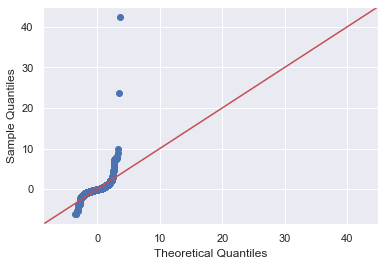

In [839]:
fog = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit= True)

In [840]:
vif_scores = list(zip(cols4, vif))
x_cols = [x for x, vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

16 11


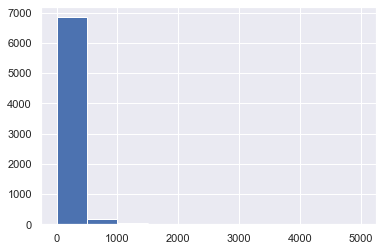

In [841]:
df.price.hist()

In [842]:
#REMOVING OUTLIERS
for i in range(0,10):
    q = i/100
    print('{} percentile: {}'.format(q, df.price.quantile(q=q)))

0.0 percentile: 0.0
0.01 percentile: 35.0
0.02 percentile: 39.0
0.03 percentile: 41.0
0.04 percentile: 45.0
0.05 percentile: 48.0
0.06 percentile: 50.0
0.07 percentile: 50.0
0.08 percentile: 55.0
0.09 percentile: 57.0


In [843]:
orig_tot = len(df)
df = df[df.price>56]
print('Percent removed:', (orig_tot -len(df))/orig_tot)
# df.price = df.price.map(np.log)
train, test = train_test_split(df)

Percent removed: 0.08858434586041254


In [844]:
# refit model with subset features 
predictors = '+'.join(x_cols)
formula = outcome + '~'+predictors
model = ols(formula=formula4, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     429.5
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:27:18   Log-Likelihood:                -29339.
No. Observations:                4838   AIC:                         5.871e+04
Df Residuals:                    4821   BIC:                         5.882e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               259.3809     28.030      9.254      0.000     204.429     314.333
host_listings_count                       0.4503      0.007     61.286      0.000       0.436       0.465
cleaning_fee                              0.4032      0.041      9.936      0.000       0.324       0.483
security_deposit                          0.0152      0.004      3.540      0.000       0.007       0.024
accommodates                              8.3524      1.235      6.762      0.000       5.931      10.774
bedrooms                                 17.7399      2.592      6.844      0.000      12.658      22.822
minimum_nights                           -0.5448      0.151     -3.613      0.000      -0.840      -0.249
guests_included                           7.8273      1.093      7.159      0.000       5.684       9.971
reviews_per_month                        -5.3346      0.797     -6.696      0.000      -6.896      -3.773
calculated_host_listings_count           -0.9131      0.031    -29.223      0.000      -0.974      -0.852
room_type_Shared_room                   -33.1241     33.316     -0.994      0.320     -98.438      32.190
room_type_Private_room                  -28.2966      4.853     -5.830      0.000     -37.811     -18.782
room_type_Hotel_room                    166.7708     12.588     13.248      0.000     142.092     191.450
host_response_time_unknown             -191.4843     28.142     -6.804      0.000    -246.655    -136.313
host_response_time_within_a_day        -198.2206     29.115     -6.808      0.000    -255.299    -141.142
host_response_time_within_a_few_hours  -193.7076     28.405     -6.819      0.000    -249.394    -138.021
host_response_time_within_an_hour      -193.4724     28.047     -6.898      0.000    -248.458    -138.487
==============================================================================
Omnibus:                     5778.451   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2527365.032
Skew:                           5.804   Prob(JB):                         0.00
Kurtosis:                     114.368   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

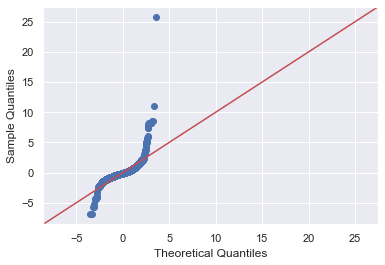

In [845]:
# Check the Homoscedasticity Assumption 
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line = '45', fit=True)

In [846]:
#REMOVING OUTLIERS
for i in range(80,100):
    q = i/100
    print('{} percentile: {}'.format(q, df.price.quantile(q=q)))

0.8 percentile: 219.0
0.81 percentile: 222.0
0.82 percentile: 225.0
0.83 percentile: 235.0
0.84 percentile: 249.0
0.85 percentile: 250.0
0.86 percentile: 250.0
0.87 percentile: 272.0
0.88 percentile: 290.0
0.89 percentile: 299.0
0.9 percentile: 300.0
0.91 percentile: 325.0
0.92 percentile: 340.0
0.93 percentile: 350.0
0.94 percentile: 390.0
0.95 percentile: 425.0
0.96 percentile: 470.0
0.97 percentile: 599.0
0.98 percentile: 999.0
0.99 percentile: 999.0


In [851]:
orig_tot = len(df)
df = df[df.price<800]
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.price = df.price.map(np.log)
train, test = train_test_split(df)

Percent removed: 0.0


In [852]:
# refit model with subset features 
predictors = '+'.join(x_cols)
formula = outcome + '~'+predictors
model = ols(formula=formula5, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     465.7
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:29:27   Log-Likelihood:                 5779.5
No. Observations:                4729   AIC:                        -1.154e+04
Df Residuals:                    4717   BIC:                        -1.146e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          1.5027      0.003    510.838      0.000       1.497       1.508
cleaning_fee                       0.0004   2.68e-05     14.002      0.000       0.000       0.000
security_deposit                7.387e-06   2.85e-06      2.591      0.010     1.8e-06     1.3e-05
accommodates                       0.0084      0.001      9.853      0.000       0.007       0.010
bedrooms                           0.0184      0.002     10.338      0.000       0.015       0.022
minimum_nights                    -0.0003   8.23e-05     -3.870      0.000      -0.000      -0.000
guests_included                    0.0032      0.001      4.116      0.000       0.002       0.005
reviews_per_month                 -0.0045      0.000     -8.993      0.000      -0.005      -0.003
calculated_host_listings_count     0.0003   1.54e-05     18.317      0.000       0.000       0.000
room_type_Shared_room             -0.0787      0.024     -3.285      0.001      -0.126      -0.032
room_type_Private_room            -0.0660      0.003    -19.683      0.000      -0.073      -0.059
room_type_Hotel_room               0.0640      0.008      7.604      0.000       0.047       0.080
==============================================================================
Omnibus:                       81.967   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.668
Skew:                           0.247   Prob(JB):                     8.38e-23
Kurtosis:                       3.521   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

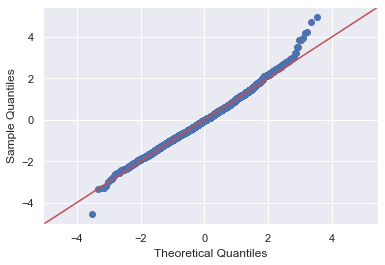

In [853]:
# Check the Homoscedasticity Assumption 
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line = '45', fit=True)

In [811]:
df.to_csv(r'df_refined.csv')

In [895]:
# checking for our model - Homoscedasticity
pred_val = model.fittedvalues.copy()
true_val = train['price'].values.copy()
residual = true_val - pred_val

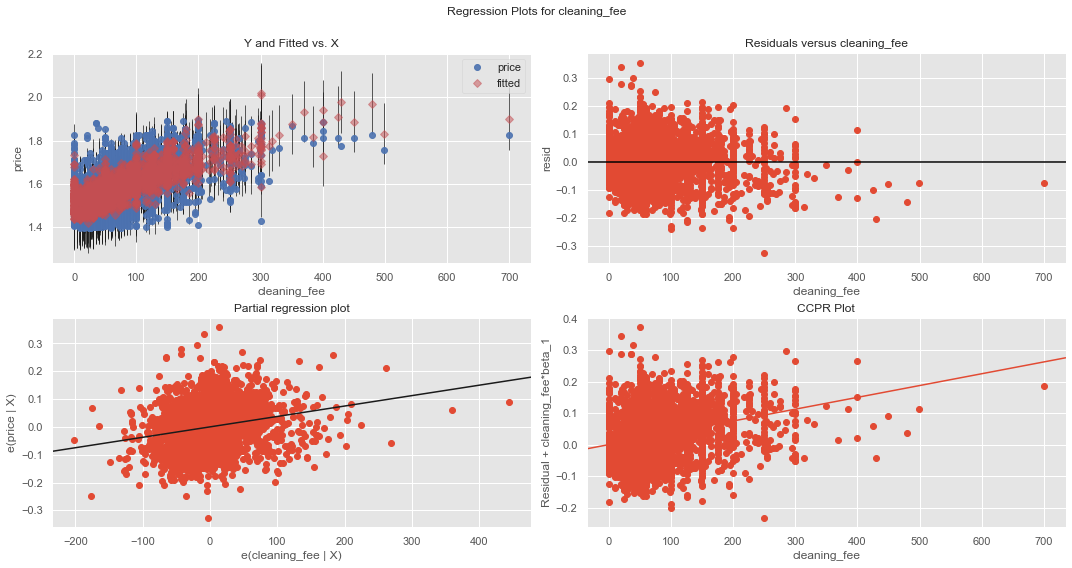

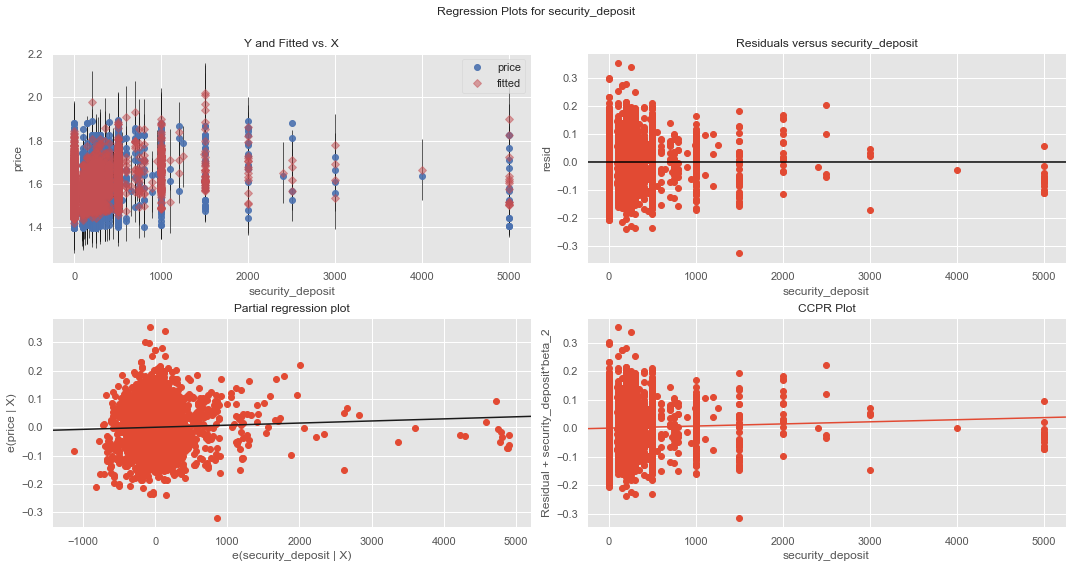

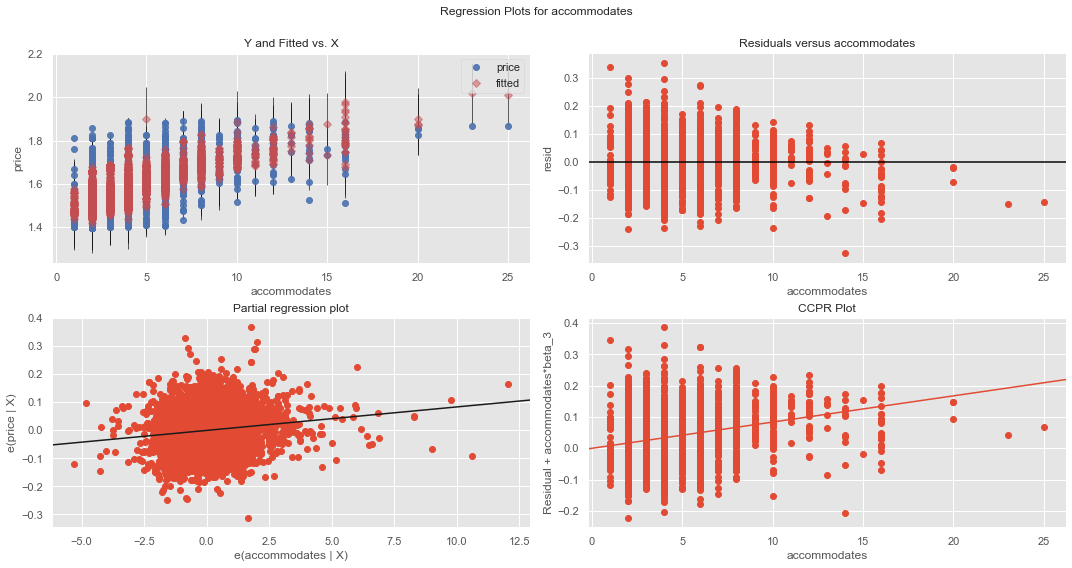

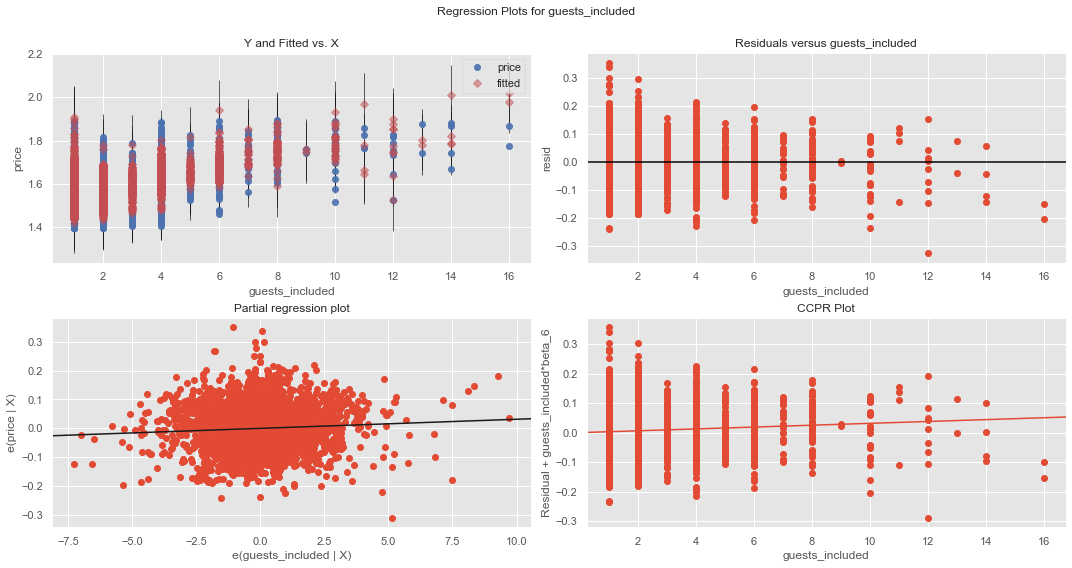

In [903]:
plt.style.use('ggplot')
cols = ['cleaning_fee', 'security_deposit', 'accommodates', 'guests_included']
for col in cols: 
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, exog_idx = col, fig=fig)
    plt.show()


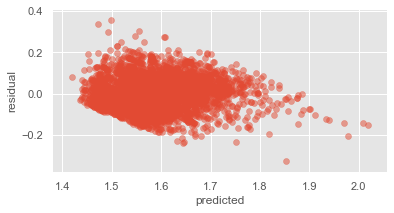

In [913]:
#Residuals vs Predictors Scatter Plot

fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(pred_val,residual, alpha = 0.5)
plt.xlabel('predicted')
plt.ylabel('residual')

plt.show()

In [698]:
df.head()

,price,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,296,2318,2,250,500,9,4,30,8,0.21,2,0,0,0,0,0,0,1
2,90,6606,5,40,200,2,1,2,2,1.19,3,0,0,0,0,0,1,0
3,62,9419,8,10,100,2,1,2,1,1.29,8,0,1,0,0,0,1,0
4,99,9460,4,45,0,2,1,3,1,3.62,4,0,1,0,0,0,0,1
5,165,9531,2,120,300,4,2,3,2,0.39,2,0,0,0,0,0,1,0


In [699]:
df2.head()

,price,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,5.690359,2318,2,250,500,9,4,30,8,0.21,2,0,0,0,0,0,0,1
2,4.499810,6606,5,40,200,2,1,2,2,1.19,3,0,0,0,0,0,1,0
3,4.127134,9419,8,10,100,2,1,2,1,1.29,8,0,1,0,0,0,1,0
4,4.595120,9460,4,45,0,2,1,3,1,3.62,4,0,1,0,0,0,0,1
5,5.105945,9531,2,120,300,4,2,3,2,0.39,2,0,0,0,0,0,1,0


In [509]:
model = ols(formula=formula4, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     564.5
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:12:11   Log-Likelihood:                -3126.5
No. Observations:                6568   AIC:                             6287.
Df Residuals:                    6551   BIC:                             6402.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 4.7987      0.095     50.428      0.000       4.612       4.985
host_listings_count                       0.0010   2.34e-05     42.760      0.000       0.001       0.001
cleaning_fee                              0.0021      0.000     16.776      0.000       0.002       0.002
security_deposit                        5.83e-05   1.39e-05      4.189      0.000     3.1e-05    8.56e-05
accommodates                              0.0401      0.004     10.066      0.000       0.032       0.048
bedrooms                                  0.0870      0.008     10.429      0.000       0.071       0.103
minimum_nights                           -0.0017      0.000     -4.567      0.000      -0.002      -0.001
guests_included                           0.0226      0.004      6.396      0.000       0.016       0.030
reviews_per_month                        -0.0242      0.003     -9.405      0.000      -0.029      -0.019
calculated_host_listings_count           -0.0011      0.000    -11.316      0.000      -0.001      -0.001
room_type_Shared_room                    -0.4044      0.101     -3.988      0.000      -0.603      -0.206
room_type_Private_room                   -0.3298      0.015    -21.872      0.000      -0.359      -0.300
room_type_Hotel_room                      0.4850      0.041     11.832      0.000       0.405       0.565
host_response_time_unknown               -0.2874      0.095     -3.012      0.003      -0.474      -0.100
host_response_time_within_a_day          -0.3189      0.098     -3.243      0.001      -0.512      -0.126
host_response_time_within_a_few_hours    -0.3320      0.096     -3.451      0.001      -0.521      -0.143
host_response_time_within_an_hour        -0.3198      0.095     -3.362      0.001      -0.506      -0.133
==============================================================================
Omnibus:                     1284.775   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7293.033
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       7.896   Cond. No.                     1.97e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [510]:
df2.head()

,price,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,5.690359,2318,2,250,500,9,4,30,8,0.21,2,0,0,0,0,0,0,1
2,4.499810,6606,5,40,200,2,1,2,2,1.19,3,0,0,0,0,0,1,0
3,4.127134,9419,8,10,100,2,1,2,1,1.29,8,0,1,0,0,0,1,0
4,4.595120,9460,4,45,0,2,1,3,1,3.62,4,0,1,0,0,0,0,1
5,5.105945,9531,2,120,300,4,2,3,2,0.39,2,0,0,0,0,0,1,0


In [511]:
df2.head()

,price,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,5.690359,2318,2,250,500,9,4,30,8,0.21,2,0,0,0,0,0,0,1
2,4.499810,6606,5,40,200,2,1,2,2,1.19,3,0,0,0,0,0,1,0
3,4.127134,9419,8,10,100,2,1,2,1,1.29,8,0,1,0,0,0,1,0
4,4.595120,9460,4,45,0,2,1,3,1,3.62,4,0,1,0,0,0,0,1
5,5.105945,9531,2,120,300,4,2,3,2,0.39,2,0,0,0,0,0,1,0


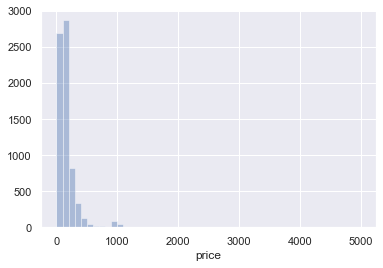

In [874]:
sns.distplot(df4.price, bins=50, kde=False);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


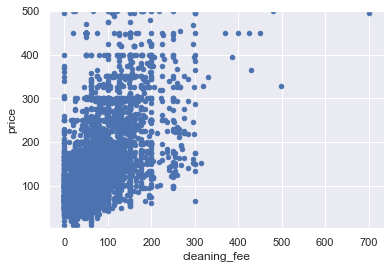

In [879]:
var = 'cleaning_fee'
data = pd.concat([df4['price'], df4[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,500));

In [176]:
def draw_boxplots(var):
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sns.boxplot(x=var, y="price", data=df3)
    fig.axis(ymin=0, ymax=1200);

In [177]:
def draw_boxplots2(var):
    f, ax = plt.subplots(figsize=(12, 6))
    fig = sns.boxplot(x=var, y="cleaning_fee", data=df3)
    fig.axis(ymin=0, ymax=500);

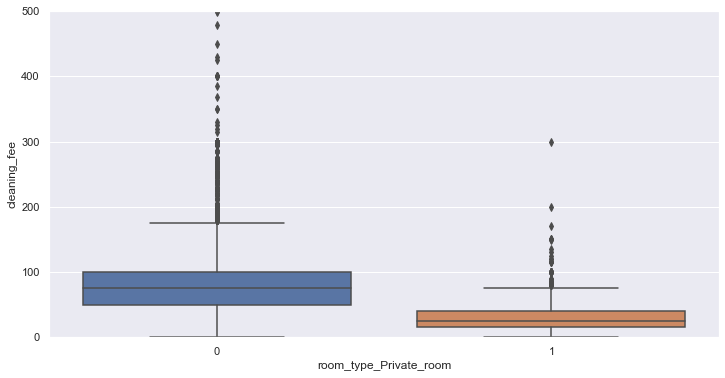

In [866]:
draw_boxplots2('room_type_Private_room')

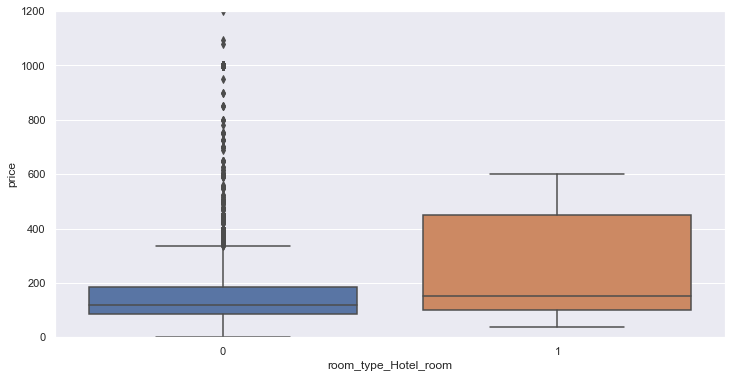

In [862]:
draw_boxplots('room_type_Hotel_room')

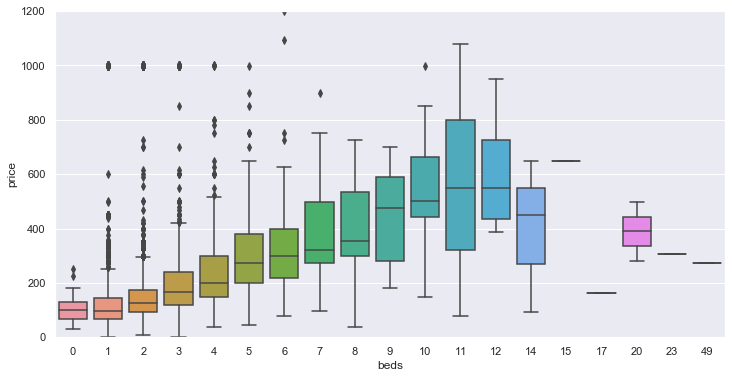

In [180]:
draw_boxplots('beds')

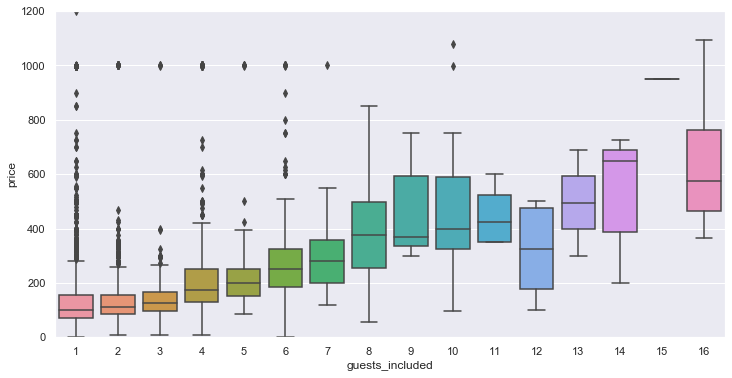

In [181]:
draw_boxplots('guests_included')

/Users/michellevenables/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


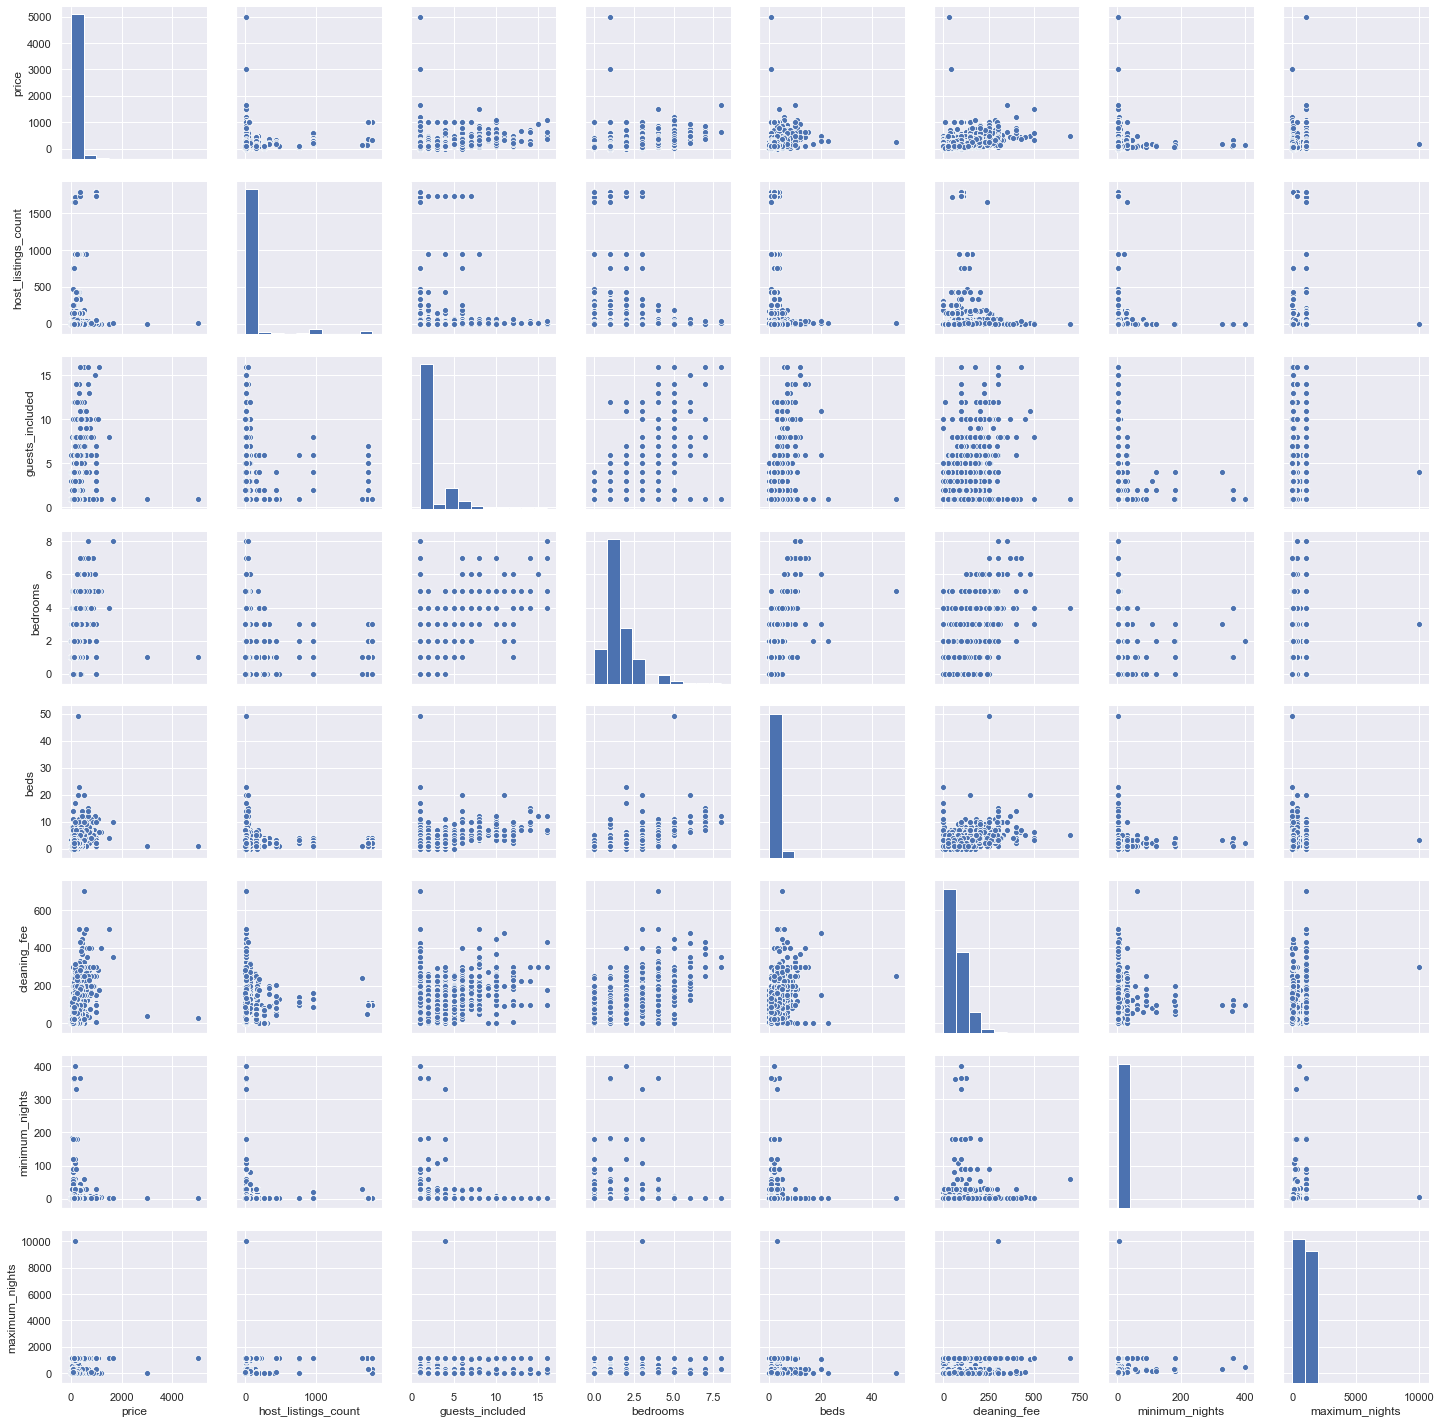

In [182]:
sns.set()
cols = ['price','host_listings_count', 'guests_included', 'bedrooms', 'beds', 'cleaning_fee', 'minimum_nights','maximum_nights']
sns.pairplot(df[cols], size = 2.5)
plt.show();

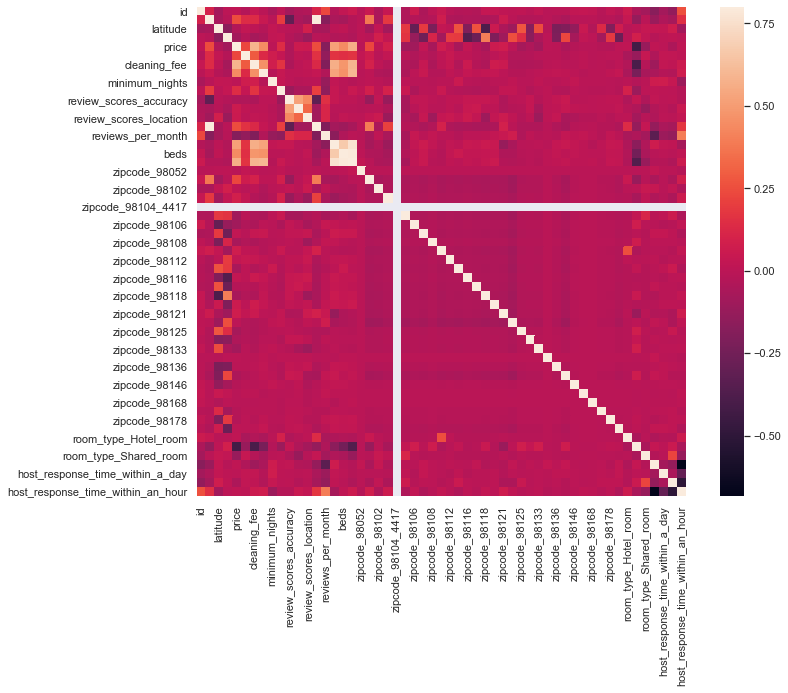

In [183]:
corrmat = df4.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

# Joint Plot

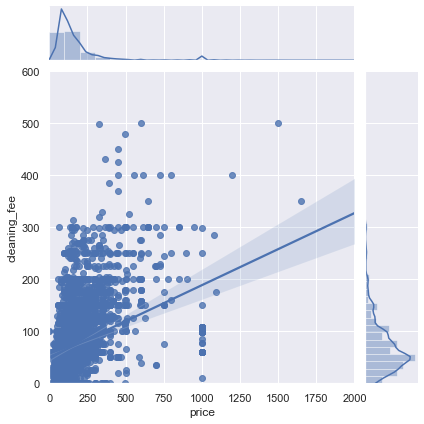

In [704]:
sns.jointplot(df4['price'], df4['cleaning_fee'],kind = 'reg',ylim = (0,600), xlim = (0,2000))

In [639]:
df4.head()

,price,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,296,2318,2,250,500,9,4,30,8,0.21,2,0,0,0,0,0,0,1
1,48,5682,1,45,120,2,0,3,1,3.99,1,0,0,0,1,0,0,0
2,90,6606,5,40,200,2,1,2,2,1.19,3,0,0,0,0,0,1,0
3,62,9419,8,10,100,2,1,2,1,1.29,8,0,1,0,0,0,1,0
4,99,9460,4,45,0,2,1,3,1,3.62,4,0,1,0,0,0,0,1


In [894]:
# checking for our model - Homoscedasticity
pred_val = model1.fittedvalues.copy()
true_val = df4['price'].values.copy()
residual = true_val - pred_val

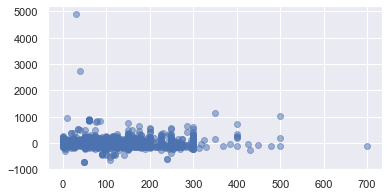

In [887]:
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(df4[var],residual, alpha = 0.5)

0.9523990893322951

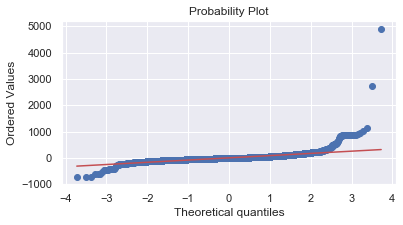

In [653]:
# checking for normality - QQ plot 
import scipy as sp
fig, ax = plt.subplots(figsize=(6,3))
sp.stats.probplot(residual, plot=ax, fit=True)

0.9523990893322951

# Train Test Split 

In [709]:
df.head()

,price,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,296,2318,2,250,500,9,4,30,8,0.21,2,0,0,0,0,0,0,1
2,90,6606,5,40,200,2,1,2,2,1.19,3,0,0,0,0,0,1,0
3,62,9419,8,10,100,2,1,2,1,1.29,8,0,1,0,0,0,1,0
4,99,9460,4,45,0,2,1,3,1,3.62,4,0,1,0,0,0,0,1
5,165,9531,2,120,300,4,2,3,2,0.39,2,0,0,0,0,0,1,0


In [710]:
target = df.price

#Date  is not in the correct format so we are dropping it for now.
features = df.drop(['price'], axis=1)

In [711]:
features.head()

,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,2318,2,250,500,9,4,30,8,0.21,2,0,0,0,0,0,0,1
2,6606,5,40,200,2,1,2,2,1.19,3,0,0,0,0,0,1,0
3,9419,8,10,100,2,1,2,1,1.29,8,0,1,0,0,0,1,0
4,9460,4,45,0,2,1,3,1,3.62,4,0,1,0,0,0,0,1
5,9531,2,120,300,4,2,3,2,0.39,2,0,0,0,0,0,1,0


In [712]:
features.columns

Index(['id', 'host_listings_count', 'cleaning_fee', 'security_deposit',
       'accommodates', 'bedrooms', 'minimum_nights', 'guests_included',
       'reviews_per_month', 'calculated_host_listings_count',
       'room_type_Shared_room', 'room_type_Private_room',
       'room_type_Hotel_room', 'host_response_time_unknown',
       'host_response_time_within_a_day',
       'host_response_time_within_a_few_hours',
       'host_response_time_within_an_hour'],
      dtype='object')

# Create Train and Test Split
The random state variable makes it so you can always have the same 'random' split

In [713]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (4979, 17) Target:  (4979,)
Test set - Features:  (1245, 17) Target:  (1245,)


In [714]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)


print(lm.intercept_)
print(lm.coef_)

77.456698295943
[-5.35446312e-08 -1.17139544e-02  3.15636080e-01  1.05486857e-02
  7.46646839e+00  1.40355004e+01 -2.54208644e-01  3.19486858e+00
 -2.31990648e+00  2.74885910e-01 -4.73838613e+01 -2.94119534e+01
  3.06803512e+00  1.55181097e+00 -3.10937530e+00 -6.20762090e+00
 -7.29769680e+00]


# How well did our model perform?

In [715]:
print ("R^2 Score:", lm.score(X_train, y_train))
#the model explains 49% of the data  

R^2 Score: 0.4891565733889277


In [716]:
y_train_pred = lm.predict(X_train)

In [718]:
#import the metrics module from sklearn
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 39.442037441795286
Mean Squared Error: 2877.120211177612
Root Mean Squared Error: 53.638793901220524


>RMSE is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed


In [719]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.5301294212212043
Root Mean Squared Error: 0.7209440640032819


# Predicting the Test Set

In [720]:
y_pred = lm.predict(X_test)

ValueError: x and y must be the same size

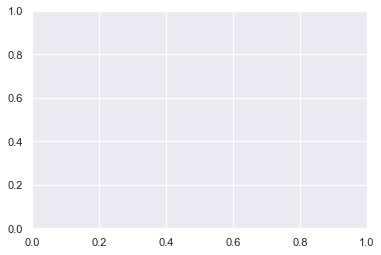

In [790]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

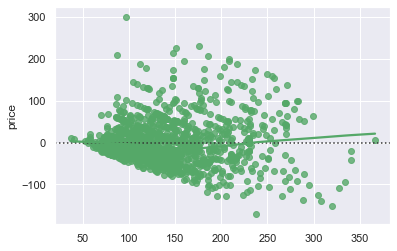

In [722]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [723]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.43142897843701095


In [724]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:39.50713231536538
Mean Squared Error:2917.796337191303
Root Mean Squared Error:54.016630191000466


In [725]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.5310043432558763
Root Mean Squared Error Z: 0.7260224561607103


**Comparing our Model's performance on training data versus test data.**

In [726]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  53 vs. Testing:  54


# Let's try with more features: polynormial features

In [727]:
#import feature from sklearn to help us create  polynomial features
from sklearn.preprocessing import PolynomialFeatures

#instantiate this class
poly_2 = PolynomialFeatures(degree=2, interaction_only=False)
#fit and transform the data and create a  new dataframe
df_poly_2= pd.DataFrame(poly_2.fit_transform(features), columns=poly_2.get_feature_names(features.columns))

In [728]:
df_poly_2

,1,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,id^2,id host_listings_count,id cleaning_fee,id security_deposit,id accommodates,id bedrooms,id minimum_nights,id guests_included,id reviews_per_month,id calculated_host_listings_count,id room_type_Shared_room,id room_type_Private_room,id room_type_Hotel_room,id host_response_time_unknown,id host_response_time_within_a_day,id host_response_time_within_a_few_hours,id host_response_time_within_an_hour,host_listings_count^2,host_listings_count cleaning_fee,host_listings_count security_deposit,host_listings_count accommodates,host_listings_count bedrooms,host_listings_count minimum_nights,host_listings_count guests_included,host_listings_count reviews_per_month,host_listings_count calculated_host_listings_count,host_listings_count room_type_Shared_room,host_listings_count room_type_Private_room,host_listings_count room_type_Hotel_room,host_listings_count host_response_time_unknown,host_listings_count host_response_time_within_a_day,host_listings_count host_response_time_within_a_few_hours,host_listings_count host_response_time_within_an_hour,cleaning_fee^2,cleaning_fee security_deposit,cleaning_fee accommodates,cleaning_fee bedrooms,cleaning_fee minimum_nights,cleaning_fee guests_included,cleaning_fee reviews_per_month,cleaning_fee calculated_host_listings_count,cleaning_fee room_type_Shared_room,cleaning_fee room_type_Private_room,cleaning_fee room_type_Hotel_room,cleaning_fee host_response_time_unknown,cleaning_fee host_response_time_within_a_day,cleaning_fee host_response_time_within_a_few_hours,cleaning_fee host_response_time_within_an_hour,security_deposit^2,security_deposit accommodates,security_deposit bedrooms,security_deposit minimum_nights,security_deposit guests_included,security_deposit reviews_per_month,security_deposit calculated_host_listings_count,security_deposit room_type_Shared_room,security_deposit room_type_Private_room,security_deposit room_type_Hotel_room,security_deposit host_response_time_unknown,security_deposit host_response_time_within_a_day,security_deposit host_response_time_within_a_few_hours,security_deposit host_response_time_within_an_hour,accommodates^2,accommodates bedrooms,accommodates minimum_nights,accommodates guests_included,accommodates reviews_per_month,accommodates calculated_host_listings_count,accommodates room_type_Shared_room,accommodates room_type_Private_room,accommodates room_type_Hotel_room,accommodates host_response_time_unknown,accommodates host_response_time_within_a_day,accommodates host_response_time_within_a_few_hours,accommodates host_response_time_within_an_hour,bedrooms^2,bedrooms minimum_nights,bedrooms guests_included,bedrooms reviews_per_month,bedrooms calculated_host_listings_count,bedrooms room_type_Shared_room,bedrooms room_type_Private_room,bedrooms room_type_Hotel_room,bedrooms host_response_time_unknown,bedrooms host_response_time_within_a_day,bedrooms host_response_time_within_a_few_hours,bedrooms host_response_time_within_an_hour,minimum_nights^2,minimum_nights guests_included,minimum_nights reviews_per_month,minimum_nights calculated_host_listings_count,minimum_nights room_type_Shared_room,minimum_nights room_type_Private_room,minimum_nights room_type_Hotel_room,minimum_nights host_response_time_unknown,minimum_nights host_response_time_within_a_day,minimum_nights host_response_time_within_a_few_hours,minimum_nights host_response_time_within_an_hour,guests_included^2,guests_included reviews_per_month,guests_included calculated_host_listings_count,guests_included room_type_Shared_room,guests_included room_type_Private_room,guests_included room_type_Hotel_room,guests_included host_response_time_unknown,guests_incl

In [731]:
pd.set_option('display.max_columns', 300)

In [732]:
df_poly_2.head()

,1,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,id^2,id host_listings_count,id cleaning_fee,id security_deposit,id accommodates,id bedrooms,id minimum_nights,id guests_included,id reviews_per_month,id calculated_host_listings_count,id room_type_Shared_room,id room_type_Private_room,id room_type_Hotel_room,id host_response_time_unknown,id host_response_time_within_a_day,id host_response_time_within_a_few_hours,id host_response_time_within_an_hour,host_listings_count^2,host_listings_count cleaning_fee,host_listings_count security_deposit,host_listings_count accommodates,host_listings_count bedrooms,host_listings_count minimum_nights,host_listings_count guests_included,host_listings_count reviews_per_month,host_listings_count calculated_host_listings_count,host_listings_count room_type_Shared_room,host_listings_count room_type_Private_room,host_listings_count room_type_Hotel_room,host_listings_count host_response_time_unknown,host_listings_count host_response_time_within_a_day,host_listings_count host_response_time_within_a_few_hours,host_listings_count host_response_time_within_an_hour,cleaning_fee^2,cleaning_fee security_deposit,cleaning_fee accommodates,cleaning_fee bedrooms,cleaning_fee minimum_nights,cleaning_fee guests_included,cleaning_fee reviews_per_month,cleaning_fee calculated_host_listings_count,cleaning_fee room_type_Shared_room,cleaning_fee room_type_Private_room,cleaning_fee room_type_Hotel_room,cleaning_fee host_response_time_unknown,cleaning_fee host_response_time_within_a_day,cleaning_fee host_response_time_within_a_few_hours,cleaning_fee host_response_time_within_an_hour,security_deposit^2,security_deposit accommodates,security_deposit bedrooms,security_deposit minimum_nights,security_deposit guests_included,security_deposit reviews_per_month,security_deposit calculated_host_listings_count,security_deposit room_type_Shared_room,security_deposit room_type_Private_room,security_deposit room_type_Hotel_room,security_deposit host_response_time_unknown,security_deposit host_response_time_within_a_day,security_deposit host_response_time_within_a_few_hours,security_deposit host_response_time_within_an_hour,accommodates^2,accommodates bedrooms,accommodates minimum_nights,accommodates guests_included,accommodates reviews_per_month,accommodates calculated_host_listings_count,accommodates room_type_Shared_room,accommodates room_type_Private_room,accommodates room_type_Hotel_room,accommodates host_response_time_unknown,accommodates host_response_time_within_a_day,accommodates host_response_time_within_a_few_hours,accommodates host_response_time_within_an_hour,bedrooms^2,bedrooms minimum_nights,bedrooms guests_included,bedrooms reviews_per_month,bedrooms calculated_host_listings_count,bedrooms room_type_Shared_room,bedrooms room_type_Private_room,bedrooms room_type_Hotel_room,bedrooms host_response_time_unknown,bedrooms host_response_time_within_a_day,bedrooms host_response_time_within_a_few_hours,bedrooms host_response_time_within_an_hour,minimum_nights^2,minimum_nights guests_included,minimum_nights reviews_per_month,minimum_nights calculated_host_listings_count,minimum_nights room_type_Shared_room,minimum_nights room_type_Private_room,minimum_nights room_type_Hotel_room,minimum_nights host_response_time_unknown,minimum_nights host_response_time_within_a_day,minimum_nights host_response_time_within_a_few_hours,minimum_nights host_response_time_within_an_hour,guests_included^2,guests_included reviews_per_month,guests_included calculated_host_listings_count,guests_included room_type_Shared_room,guests_included room_type_Private_room,guests_included room_type_Hotel_room,guests_included host_response_time_unknown,guests_incl

In [733]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df_poly_2, target, random_state=34,test_size=0.2)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(4979, 171) (4979,)
(1245, 171) (1245,)


In [734]:
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2_train, y2_train)
y2_train_pred = lm2.predict(X2_train)

In [735]:
train2_mae = metrics.mean_absolute_error(y2_train, y2_train_pred)

In [736]:
y2_pred = lm2.predict(X2_test)
# sns.residplot(y2_pred, y2_test, lowess=True, color="g")

test2_mae = metrics.mean_absolute_error(y2_test, y2_pred)

print("Training Error: ", train2_mae, "vs. Testing Error: ", test2_mae)

Training Error:  39.8185355793986 vs. Testing Error:  47.00790262257296


# Now lets try and add on even more variables!

In [737]:
poly = PolynomialFeatures(degree=3, interaction_only= False )

In [738]:
df_poly_3= pd.DataFrame(poly.fit_transform(features), columns=poly.get_feature_names(features.columns))
df_poly_3.head()

,1,id,host_listings_count,cleaning_fee,security_deposit,accommodates,bedrooms,minimum_nights,guests_included,reviews_per_month,calculated_host_listings_count,room_type_Shared_room,room_type_Private_room,room_type_Hotel_room,host_response_time_unknown,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,id^2,id host_listings_count,id cleaning_fee,id security_deposit,id accommodates,id bedrooms,id minimum_nights,id guests_included,id reviews_per_month,id calculated_host_listings_count,id room_type_Shared_room,id room_type_Private_room,id room_type_Hotel_room,id host_response_time_unknown,id host_response_time_within_a_day,id host_response_time_within_a_few_hours,id host_response_time_within_an_hour,host_listings_count^2,host_listings_count cleaning_fee,host_listings_count security_deposit,host_listings_count accommodates,host_listings_count bedrooms,host_listings_count minimum_nights,host_listings_count guests_included,host_listings_count reviews_per_month,host_listings_count calculated_host_listings_count,host_listings_count room_type_Shared_room,host_listings_count room_type_Private_room,host_listings_count room_type_Hotel_room,host_listings_count host_response_time_unknown,host_listings_count host_response_time_within_a_day,host_listings_count host_response_time_within_a_few_hours,host_listings_count host_response_time_within_an_hour,cleaning_fee^2,cleaning_fee security_deposit,cleaning_fee accommodates,cleaning_fee bedrooms,cleaning_fee minimum_nights,cleaning_fee guests_included,cleaning_fee reviews_per_month,cleaning_fee calculated_host_listings_count,cleaning_fee room_type_Shared_room,cleaning_fee room_type_Private_room,cleaning_fee room_type_Hotel_room,cleaning_fee host_response_time_unknown,cleaning_fee host_response_time_within_a_day,cleaning_fee host_response_time_within_a_few_hours,cleaning_fee host_response_time_within_an_hour,security_deposit^2,security_deposit accommodates,security_deposit bedrooms,security_deposit minimum_nights,security_deposit guests_included,security_deposit reviews_per_month,security_deposit calculated_host_listings_count,security_deposit room_type_Shared_room,security_deposit room_type_Private_room,security_deposit room_type_Hotel_room,security_deposit host_response_time_unknown,security_deposit host_response_time_within_a_day,security_deposit host_response_time_within_a_few_hours,security_deposit host_response_time_within_an_hour,accommodates^2,accommodates bedrooms,accommodates minimum_nights,accommodates guests_included,accommodates reviews_per_month,accommodates calculated_host_listings_count,accommodates room_type_Shared_room,accommodates room_type_Private_room,accommodates room_type_Hotel_room,accommodates host_response_time_unknown,accommodates host_response_time_within_a_day,accommodates host_response_time_within_a_few_hours,accommodates host_response_time_within_an_hour,bedrooms^2,bedrooms minimum_nights,bedrooms guests_included,bedrooms reviews_per_month,bedrooms calculated_host_listings_count,bedrooms room_type_Shared_room,bedrooms room_type_Private_room,bedrooms room_type_Hotel_room,bedrooms host_response_time_unknown,bedrooms host_response_time_within_a_day,bedrooms host_response_time_within_a_few_hours,bedrooms host_response_time_within_an_hour,minimum_nights^2,minimum_nights guests_included,minimum_nights reviews_per_month,minimum_nights calculated_host_listings_count,minimum_nights room_type_Shared_room,minimum_nights room_type_Private_room,minimum_nights room_type_Hotel_room,minimum_nights host_response_time_unknown,minimum_nights host_response_time_within_a_day,minimum_nights host_response_time_within_a_few_hours,minimum_nights host_response_time_within_an_hour,guests_included^2,guests_included reviews_per_month,guests_included calculated_host_listings_count,guests_included room_type_Shared_room,guests_included room_type_Private_room,guests_included room_type_Hotel_room,guests_included host_response_time_unknown,guests_incl

In [739]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(df_poly_3, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4979, 17) (4979,)
(1245, 17) (1245,)


In [740]:
# fit a model
lm3 = linear_model.LinearRegression()
lm3 = lm.fit(X_train3, y_train3)

In [741]:
y_train_pred3 = lm3.predict(X_train3)

In [742]:

train_mae3 = metrics.mean_absolute_error(y_train3, y_train_pred3)

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train3, y_train_pred3)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train3, y_train_pred3)))
print('SqRt of Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train3, y_train_pred3))))

Mean Absolute Error:49.16972344450772
Mean Squared Error:5026.898183150732
SqRt of Mean Squared Error:70.90062188126936


In [743]:
y_pred3 = lm.predict(X_test3)

In [744]:
test_mae3 = metrics.mean_absolute_error(y_test3, y_pred3)
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test3, y_pred3)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test3, y_pred3)))
print('SqRt of Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))))

Mean Absolute Error:68.53305604869358
Mean Squared Error:305954.8004934928
SqRt of Mean Squared Error:553.1318111386225


# Comparing our Training Error and Test Error across models

In [745]:
errors = [[train_mae, test_mae], 
[ train2_mae, test2_mae],
[ train_mae3, test_mae3]]

In [746]:
df_error = pd.DataFrame(errors,index=[1,2,3],  columns=['train_error', 'test_error'])

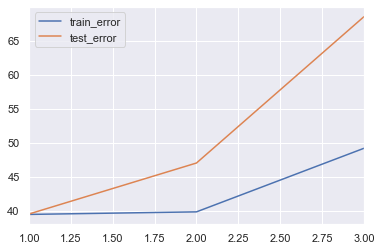

In [747]:
df_error.plot.line()